<a href="https://colab.research.google.com/github/Aminah-Abo-Shlbayah/-Apply-DCT-to-an-image/blob/main/Apply_DCT_to_an_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [293]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import r_
from numpy import pi
import cv2  
import scipy
import ipywidgets as widgets
import IPython.display as display
from scipy.fftpack import dct 
img = cv2.imread("/content/aminah.jpg")
#print (img)


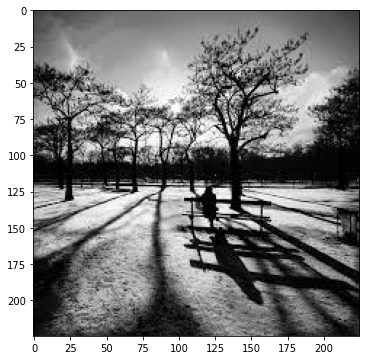

In [294]:
plt.figure(figsize=(6,6))
#orgimg = cv2_imshow(img)
plt.imshow(img)

In [295]:
img_3d = img.shape
#print (img)
#print (img_3d)
dct = np.zeros(img_3d)
for i in r_[:img_3d[0]:8]:  
  for j in r_[:img_3d[1]:8]:
    dct[i:(i+8),j:(j+8)] = scipy.fftpack.dct( scipy.fftpack.dct( img[i:(i+8),j:(j+8)], axis=0, norm='ortho' ), axis=1, norm='ortho' )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'The DCTs Of The Image (8*8)')

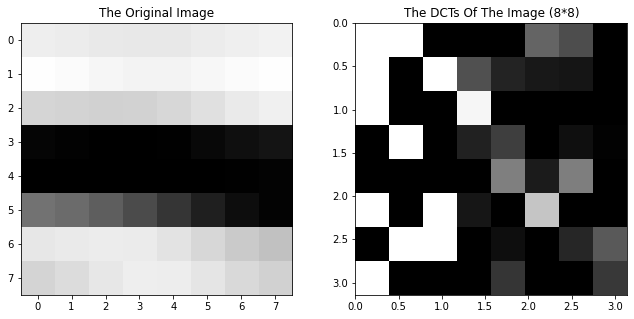

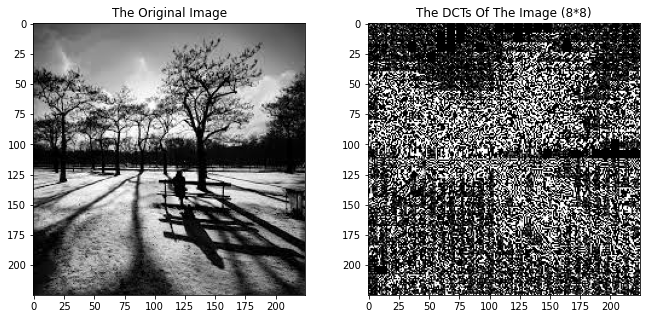

In [296]:
fig, ax = plt.subplots(1,2,figsize=(11,5))
block = 128
ax[0].imshow(img[block:block+8,block:block+8])
ax[1].imshow(dct[block:block+8,block:block+8],vmax= np.max(dct)*0.01,vmin = 0, extent=[0,pi,pi,0])
ax[0].set_title('The Original Image')
ax[1].set_title('The DCTs Of The Image (8*8)')

fig, ax = plt.subplots(1,2,figsize=(11,5))
ax[0].imshow(img);
ax[1].imshow(dct);
ax[0].set_title('The Original Image')
ax[1].set_title('The DCTs Of The Image (8*8)')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Keeping only 105.280000% of the DCT coefficients


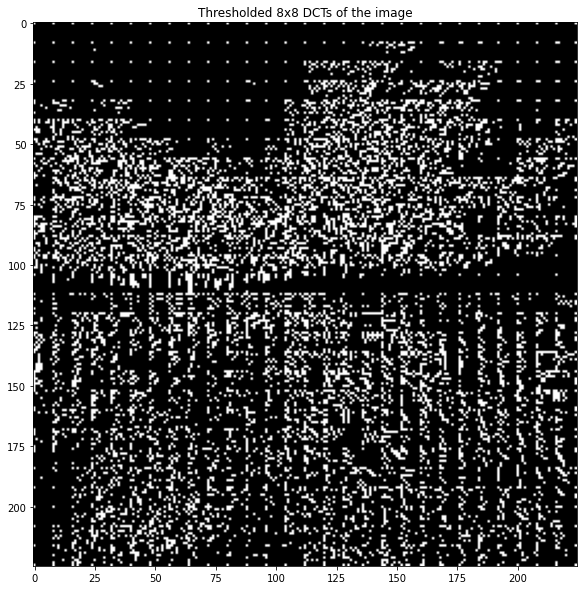

In [297]:
# Threshold
thresh = 0.012
dct_thresh = dct * (abs(dct) > (thresh*np.max(dct)))
#print (dct_thresh)
plt.figure()
plt.imshow(dct_thresh,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "Thresholded 8x8 DCTs of the image")

percent_nonzeros = np.sum( dct_thresh != 0.0 ) / (img_3d[0]*img_3d[1]*1.0)

print ("Keeping only %f%% of the DCT coefficients" % (percent_nonzeros*100.0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'The Recosntracted Image')

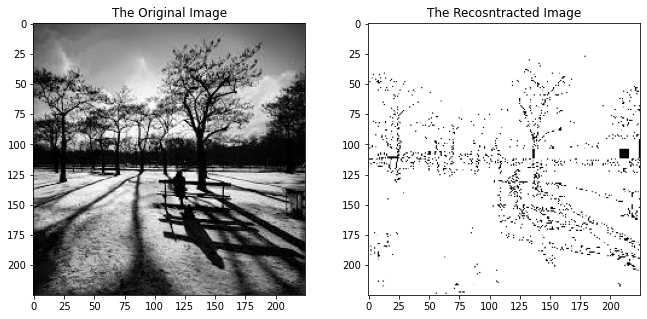

In [298]:
im_dct = np.zeros(img_3d)
for i in r_[:img_3d[0]:8]:
    for j in r_[:img_3d[1]:8]:
        im_dct[i:(i+8),j:(j+8)] = scipy.fftpack.idct( scipy.fftpack.idct( dct_thresh[i:(i+8),j:(j+8)], axis=0 , norm='ortho'), axis=1 , norm='ortho')
        
fig, ax = plt.subplots(1,2,figsize=(11,5))
ax[0].imshow(img);
ax[1].imshow(im_dct,cmap='gray');

ax[0].set_title('The Original Image')
ax[1].set_title('The Recosntracted Image')
